<a href="https://colab.research.google.com/github/KeerthanaBanisetty/yamato/blob/main/houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [12]:
url='/content/housepriceprediction/Train.csv'

dataframe=pd.read_csv(url)
dataframe.head(6)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
5,Owner,0,0,3,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,42.0


In [13]:
dataframe.shape

(29451, 12)

In [14]:
dataframe.describe

<bound method NDFrame.describe of       POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0         Owner                   0     0        2       BHK  1300.236407   
1        Dealer                   0     0        2       BHK  1275.000000   
2         Owner                   0     0        2       BHK   933.159722   
3         Owner                   0     1        2       BHK   929.921143   
4        Dealer                   1     0        2       BHK   999.009247   
...         ...                 ...   ...      ...       ...          ...   
29446     Owner                   0     0        3       BHK  2500.000000   
29447     Owner                   0     0        2       BHK   769.230769   
29448    Dealer                   0     0        2       BHK  1022.641509   
29449     Owner                   0     0        2       BHK   927.079009   
29450    Dealer                   0     1        2       BHK   896.774194   

       READY_TO_MOVE  RESALE                            ADDRESS  LONGITUDE  \
0                  1       1              Ksfc Layout,Bangalore  12.969910   
1                  1       1          Vishweshwara Nagar,Mysore  12.274538   
2                  1       1                   Jigani,Bangalore  12.778033   
3                  1       1        Sector-1 Vaishali,Ghaziabad  28.642300   
4                  0       1                   New Town,Kolkata  22.592200   
...              ...     ...                                ...        ...   
29446              1       1               Shamshabad Road,Agra  27.140626   
29447              1       1  E3-108, Lake View Recidency,,Vapi  39.945409   
29448              1       1                  Ajmer Road,Jaipur  26.928785   
29449              1       1             Sholinganallur,Chennai  12.900150   
29450              1       1                   Jagatpura,Jaipur  26.832353   

        LATITUDE  TARGET(PRICE_IN_LACS)  
0      77.597960                   55.0  
1      76.644605                   51.0  
2      77.632191                   43.0  
3      77.344500                   62.5  
4      88.484911                   60.5  
...          ...                    ...  
29446  78.043277                   45.0  
29447 -86.150721                   16.0  
29448  75.828002                   27.1  
29449  80.227910                   67.0  
29450  75.841749                   27.8  

[29451 rows x 12 columns]>

In [15]:
dataframe.iloc[0:5]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [16]:
dataframe[dataframe['POSTED_BY'] == 'Dealer'].head(5)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
6,Dealer,0,0,3,BHK,1495.053957,1,1,"Sodala,Jaipur",26.916347,75.795600,66.5
8,Dealer,0,1,2,BHK,1040.000000,1,1,"Bileshivale,Bangalore",13.054202,77.674002,41.6
11,Dealer,0,0,2,BHK,1333.010179,1,1,"Hebbal,Bangalore",13.040340,77.591347,110.0


In [17]:
dataframe[(dataframe['POSTED_BY'] == 'Owner') & (dataframe['BHK_NO.'] >=5)]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
112,Owner,0,0,5,BHK,1699.834163,1,1,"Sahibabad,Ghaziabad",28.671100,77.368300,82.0
634,Owner,0,0,5,BHK,2700.096432,1,1,"Banjari,Bhopal",22.590732,76.635291,56.0
681,Owner,0,0,6,BHK,3200.189641,1,1,"Siruseri Sipcot IT-Park,Chennai",12.833224,80.210726,270.0
1293,Owner,0,0,5,BHK,1200.087279,1,1,"Rughnathpura,Surat",21.170000,72.830000,55.0
1861,Owner,0,0,5,BHK,1600.000000,1,1,"Tal Mangaon,Raigad",18.233330,73.283330,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26233,Owner,0,0,10,BHK,7500.000000,1,1,"P&T Colony,Bangalore",16.502078,80.647557,600.0
26356,Owner,0,0,5,BHK,2509.410289,1,1,"Narayanpur,Kolkata",22.401070,88.542400,120.0
28275,Owner,0,0,5,BHK,900.027693,1,1,"Maholi Road,Mathura",27.465868,77.648174,65.0
29187,Owner,0,0,20,BHK,16860.563140,1,1,"Seethammadhara,Visakhapatnam",17.741878,83.308875,2000.0


In [18]:
dataframe[(dataframe['SQUARE_FT'] >= 5000) & (dataframe['BHK_NO.'] >=4)]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
57,Owner,0,1,4,BHK,5200.945626,1,1,"Sector-76 Noida,Noida",28.567633,77.383124,110.0
160,Dealer,0,0,4,BHK,6974.645114,1,1,"New Alipore,Kolkata",22.530280,88.334170,1700.0
227,Dealer,0,1,5,BHK,5194.805195,1,1,"Sector-128 Noida,Noida",28.522931,77.357078,400.0
256,Dealer,0,0,5,BHK,5299.954894,1,1,"Iblur Village,Bangalore",12.916680,77.591960,470.0
302,Dealer,0,0,4,BHK,7054.132802,1,1,"Sector-81 Gurgaon,Gurgaon",28.388225,76.946376,460.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27721,Dealer,0,0,8,BHK,9594.298246,1,1,"Bhosale Nagar,Pune",18.543533,73.836246,1400.0
28233,Dealer,0,0,7,BHK,5900.053100,1,1,"Koramangala,Bangalore",12.925900,77.622900,1000.0
29004,Dealer,0,0,15,BHK,5894.736842,1,1,"Kalikapur,Kolkata",22.127030,88.518729,280.0
29187,Owner,0,0,20,BHK,16860.563140,1,1,"Seethammadhara,Visakhapatnam",17.741878,83.308875,2000.0


In [19]:
dataframe[(dataframe['SQUARE_FT'] >= 5000) & (dataframe['BHK_NO.'] >=4)|(dataframe['READY_TO_MOVE']==1)]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
5,Owner,0,0,3,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [20]:
dataframe['POSTED_BY'].replace("Dealer", "Broker.").head(5)

0      Owner
1    Broker.
2      Owner
3      Owner
4    Broker.
Name: POSTED_BY, dtype: object

In [21]:
dataframe['POSTED_BY'].replace("Owner", "Buyer.").head(5)

0    Buyer.
1    Dealer
2    Buyer.
3    Buyer.
4    Dealer
Name: POSTED_BY, dtype: object

In [22]:
dataframe['BHK_OR_RK'].replace("BHK", "SAGAR.").head(5)

0    SAGAR.
1    SAGAR.
2    SAGAR.
3    SAGAR.
4    SAGAR.
Name: BHK_OR_RK, dtype: object

In [23]:
dataframe['BHK_OR_RK'].replace("RK", "SAGAR.").head(5)

0    BHK
1    BHK
2    BHK
3    BHK
4    BHK
Name: BHK_OR_RK, dtype: object

In [24]:
dataframe['RESALE'].replace(1, "yes.").head(5)

0    yes.
1    yes.
2    yes.
3    yes.
4    yes.
Name: RESALE, dtype: object

In [25]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
%load_ext autoreload
%autoreload 2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [27]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [28]:
train = pd.read_csv(r'/content/housepriceprediction/Train.csv')
test = pd.read_csv(r'/content/housepriceprediction/Test.csv')
sample = pd.read_csv(r'/content/housepriceprediction/sample_submission.csv')

In [29]:
train.head()
test.head()
train.shape
test.shape
sample.shape

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


(29451, 12)

(68720, 11)

(68720, 1)

In [30]:
train['BHK_OR_RK']=train['BHK_OR_RK'].replace({'BHK':0,'RK':1})
train['POSTED_BY']=train['POSTED_BY'].replace({'Owner':0,'Dealer':1,'Builder':2})
test['BHK_OR_RK']=test['BHK_OR_RK'].replace({'BHK':0,'RK':1})
test['POSTED_BY']=test['POSTED_BY'].replace({'Owner':0,'Dealer':1,'Builder':2})

<Axes: title={'center': 'log of Price Distribution'}, ylabel='Density'>

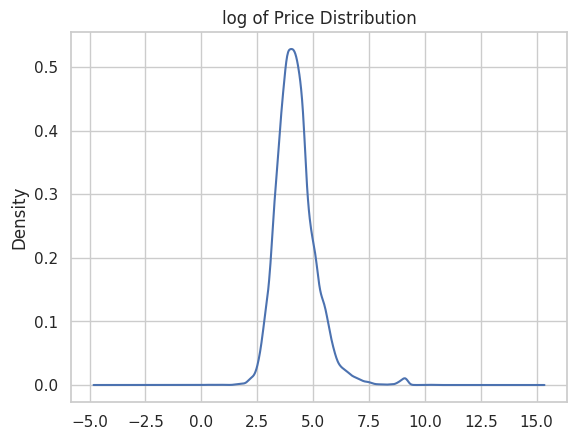

In [31]:
train['TARGET_log']=np.log1p(train['TARGET(PRICE_IN_LACS)'])
train['TARGET_log'].plot(kind = 'density', title = 'log of Price Distribution')

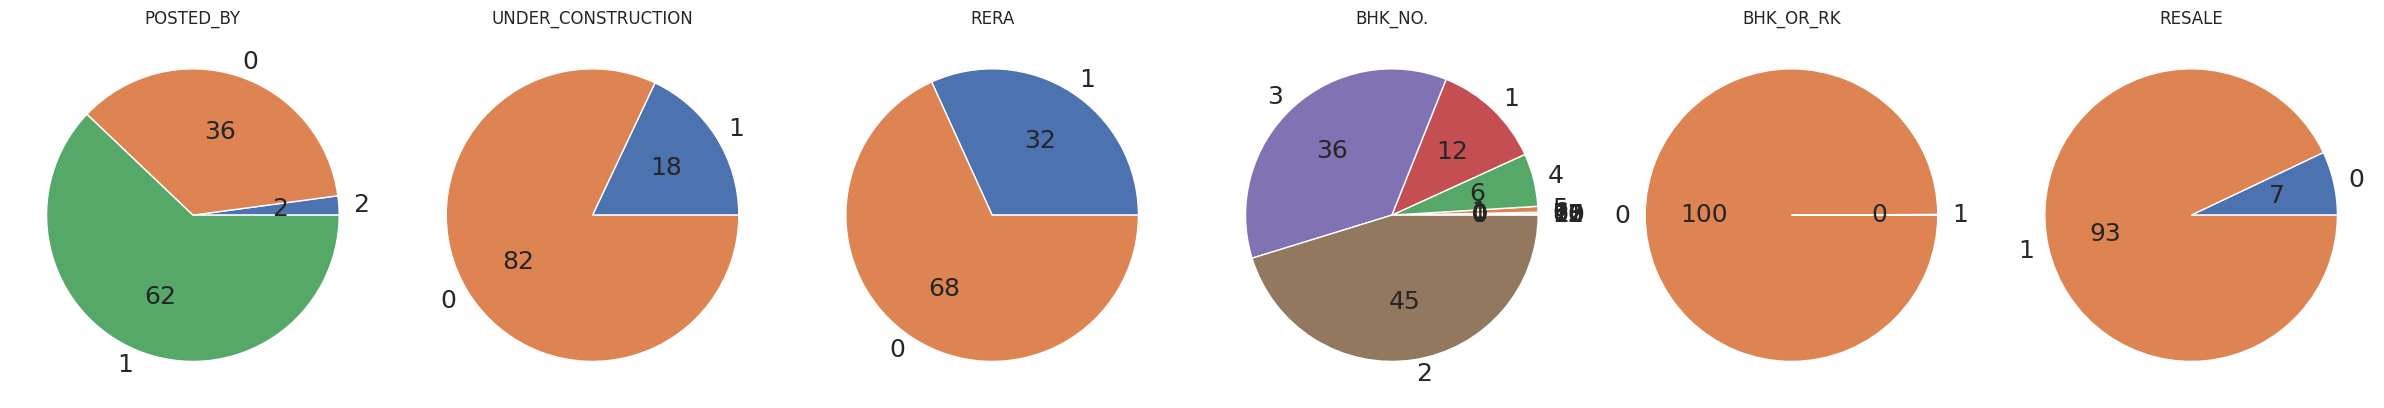

In [32]:
cat_cols = ['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK', 'RESALE']
fig, axes = plt.subplots(1, 6, figsize=(24, 10))

for i, c in enumerate(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK', 'RESALE']):
    _ = train[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=18)
    _ = axes[i].set_ylabel('')

_ = plt.tight_layout()

<Axes: xlabel='SQUARE_FT', ylabel='TARGET_log'>

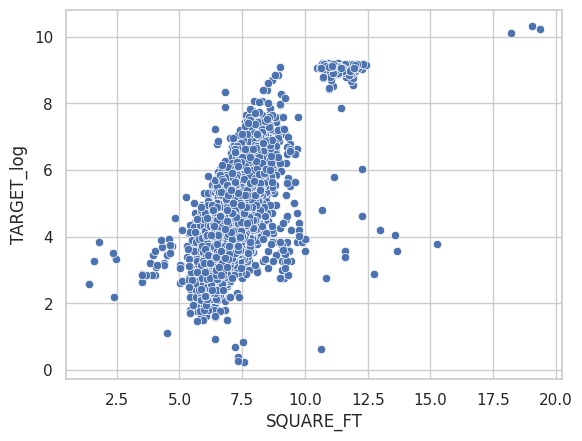

In [33]:
sns.scatterplot(x=np.log1p(train['SQUARE_FT']), y=train['TARGET_log'])

<Figure size 1500x800 with 0 Axes>

<ipython-input-34-e0ff1e85a629>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True)


<Axes: >

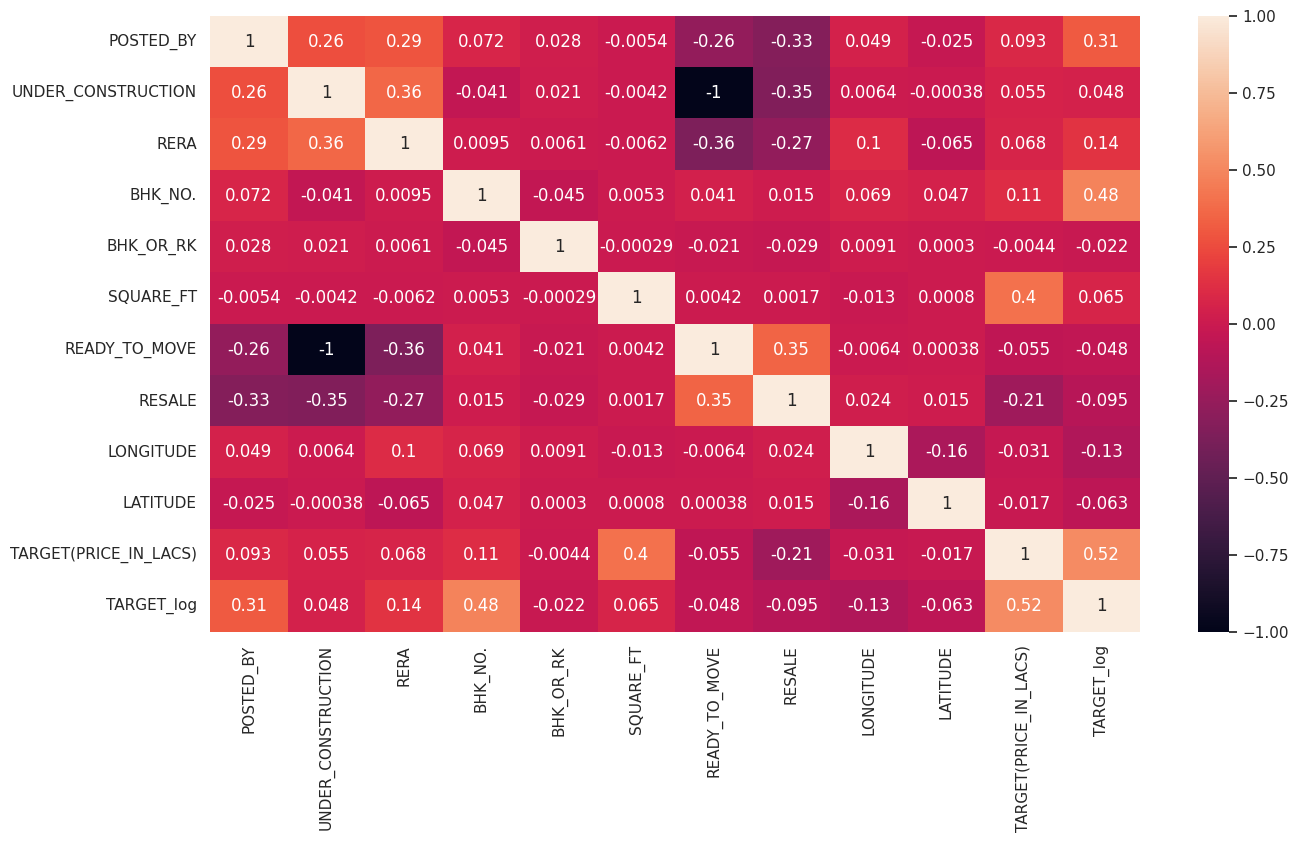

In [34]:
plt.figure(figsize=(15, 8))
sns.heatmap(train.corr(),annot=True)